In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
# Logfájl elérési útja
log_path = "training_log.csv"  

# Beolvasás
log_df = pd.read_csv(log_path)

# MAE és idő normalizálása
log_df["mae_norm"] = (log_df["test_mae"] - log_df["test_mae"].min()) / (log_df["test_mae"].max() - log_df["test_mae"].min())
log_df["time_norm"] = (log_df["elapsed_time"] - log_df["elapsed_time"].min()) / (log_df["elapsed_time"].max() - log_df["elapsed_time"].min())

# Kombinált metrika kiszámítása
log_df["score"] = log_df["mae_norm"] + log_df["time_norm"]

# Top 3 modell kiválasztása
top3 = log_df.sort_values("score").head(3)
top3_models = top3["training"].tolist()

# Megjelenítés
top3[["training", "test_mae", "elapsed_time", "score"]]


,training,test_mae,elapsed_time,score
8,logs\train_loss_H32_L1_LR0.001_BS1024_S7_PAT10...,2.054539,30.13,0.046402
11,logs\train_loss_H16_L1_LR0.001_BS1024_S7_PAT10...,2.048037,45.17,0.166678
4,logs\train_loss_H32_L1_LR0.001_BS1024_S7_PAT10...,2.122045,41.92,0.228778


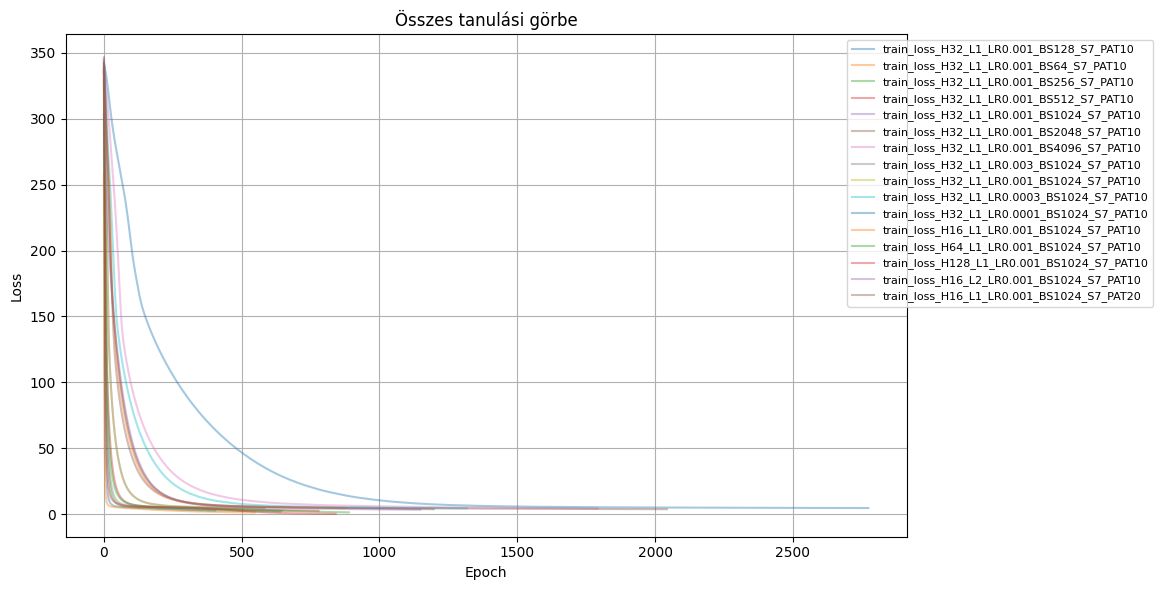

In [8]:
plt.figure(figsize=(12, 6))

for log_file in log_df["training"]:
    if os.path.exists(log_file):
        df = pd.read_csv(log_file)
        plt.plot(df["train_loss"], alpha=0.4, label=os.path.basename(log_file).split(".csv")[0])

plt.title("Összes tanulási görbe")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.grid(True)
plt.show()


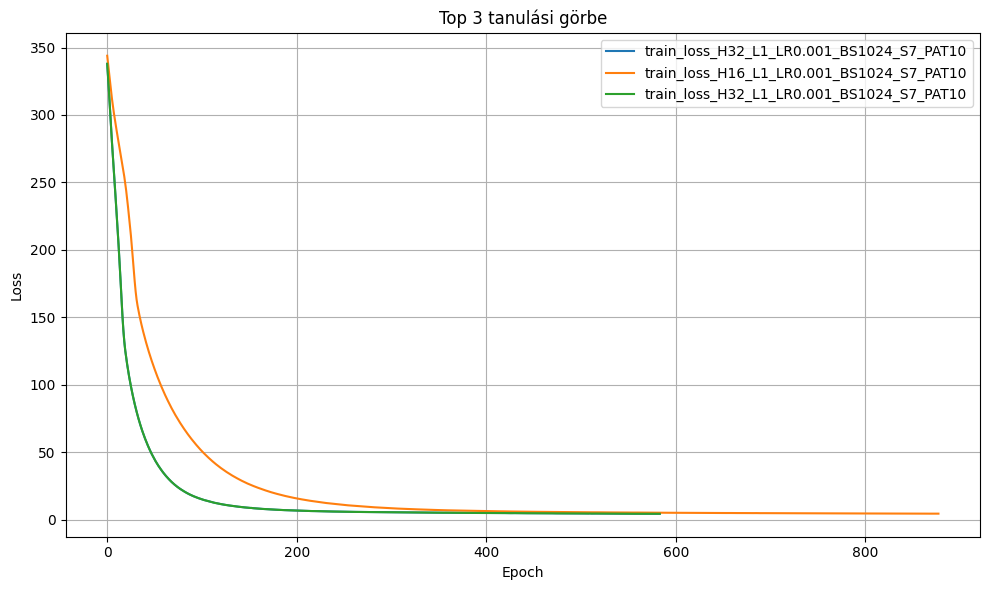

In [9]:
plt.figure(figsize=(10, 6))

for log_file in top3_models:
    if os.path.exists(log_file):
        df = pd.read_csv(log_file)
        label = os.path.basename(log_file).split(".csv")[0]
        plt.plot(df["train_loss"], label=label)

plt.title("Top 3 tanulási görbe")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
